<a href="https://colab.research.google.com/github/genilaura-g/Exploratory-Data-Analysis/blob/main/MASTERCARD_X_FORAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Job Simulation - Mastercard x Forage

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_excel('/content/sample_data/GreenTrail Store Data.xlsx')

df = pd.DataFrame(data)

df.head()

,Store ID,Location,Store Size,Store Type,Promotion ID,Type of Promotion,Promotion Start Date,Promotion End Date,Weekly Sales During Promotion,Weekly Sales Before Promotion,Weekly Sales After Promotion,Average Daily Visits During Promotion,Average Daily Visits Before Promotion,Average Daily Visits After Promotion
0,1,New York,2000,Urban,101,Discount,2023-06-01,2023-06-14,50000,30000,35000,400,300,350
1,2,Los Angeles,1500,Suburban,102,Buy-One-Get-One,2023-05-15,2023-05-28,45000,35000,30000,450,400,375
2,3,Chicago,1800,Urban,103,Special Event,2023-07-01,2023-07-14,60000,40000,40000,500,350,450
3,4,Houston,1600,Suburban,104,Discount,2023-06-10,2023-06-24,48000,32000,33000,425,310,320
4,5,Phoenix,1700,Urban,105,Buy-One-Get-One,2023-04-20,2023-05-04,53000,34000,36000,475,350,370


In [ ]:
df.describe()

,Store ID,Store Size,Promotion ID,Weekly Sales During Promotion,Weekly Sales Before Promotion,Weekly Sales After Promotion,Average Daily Visits During Promotion,Average Daily Visits Before Promotion,Average Daily Visits After Promotion
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,13.000000,1610.000000,113.000000,49440.000000,36800.000000,38280.000000,447.000000,357.200000,380.200000
std,7.359801,190.394328,7.359801,4691.126375,3796.928583,3506.185011,51.255081,35.680293,32.225766
min,1.000000,1300.000000,101.000000,42000.000000,30000.000000,30000.000000,350.000000,300.000000,320.000000
25%,7.000000,1500.000000,107.000000,46000.000000,34000.000000,36000.000000,410.000000,335.000000,360.000000
50%,13.000000,1600.000000,113.000000,49000.000000,36000.000000,38000.000000,425.000000,350.000000,375.000000
75%,19.000000,1750.000000,119.000000,52000.000000,40000.000000,41000.000000,480.000000,380.000000,400.000000
max,25.000000,2000.000000,125.000000,60000.000000,44000.000000,45000.000000,540.000000,430.000000,450.000000


In [ ]:
#update df types
df['Promotion Start Date']= pd.to_datetime(df['Promotion Start Date'])
df['Promotion End Date']= pd.to_datetime(df['Promotion End Date'])

In [ ]:
print(df.dtypes)

Store ID                                          int64
Location                                         object
Store Size                                        int64
Store Type                                       object
Promotion ID                                      int64
Type of Promotion                                object
Promotion Start Date                     datetime64[ns]
Promotion End Date                       datetime64[ns]
Weekly Sales During Promotion                     int64
Weekly Sales Before Promotion                     int64
Weekly Sales After Promotion                      int64
Average Daily Visits During Promotion             int64
Average Daily Visits Before Promotion             int64
Average Daily Visits After Promotion              int64
dtype: object


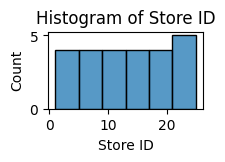

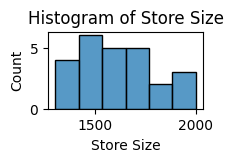

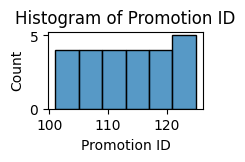

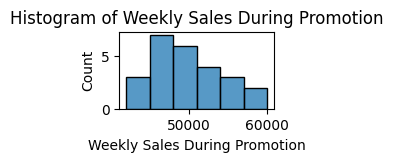

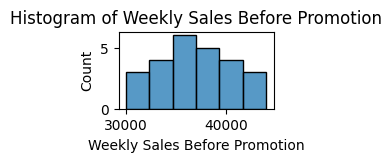

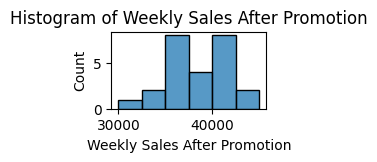

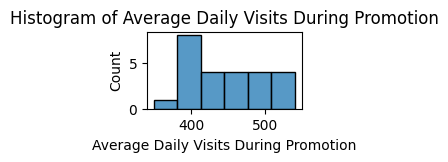

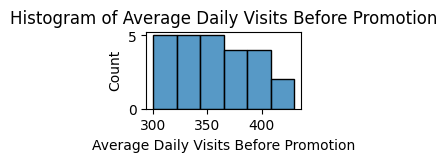

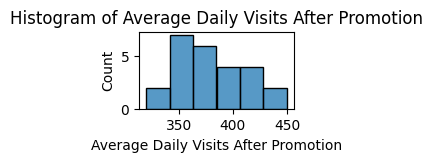

In [ ]:
#histograms numerical
numerical_cols = df.select_dtypes(include=[np.number])  # Select numerical columns
figsize=(2,1)
for col in numerical_cols.columns:
    plt.figure(figsize=figsize)
    sns.histplot(data=df, x=col)  # Create a histogram for each numerical column
    plt.title(f"Histogram of {col}")
    plt.show()

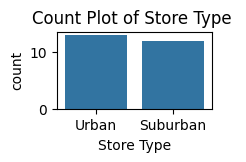

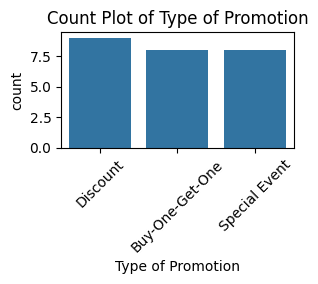

In [ ]:
#histograms categorical
plt.figure(figsize=(2,1))

sns.countplot(x='Store Type' , data=df)  # Count plot for categorical features
plt.title(f"Count Plot of Store Type ")
plt.show()

plt.figure(figsize=(3,1.5))

sns.countplot(x='Type of Promotion' , data=df)  # Count plot for categorical features
plt.title(f"Count Plot of Type of Promotion")
plt.xticks(rotation=45)
plt.show()



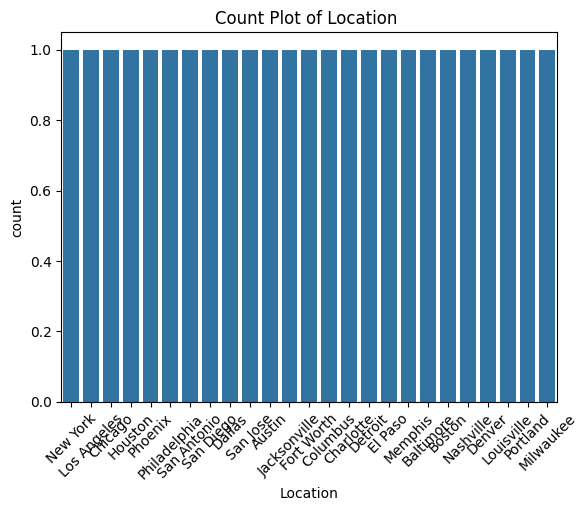

In [ ]:
sns.countplot(x='Location' , data=df)  # Count plot for categorical features
plt.title(f"Count Plot of Location ")
plt.xticks(rotation=45)
plt.show()


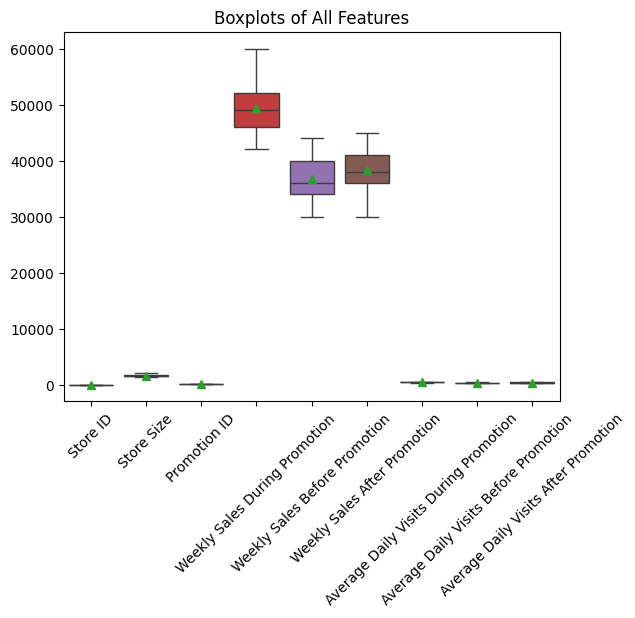

In [ ]:
#boxplot numerical
sns.boxplot(
    data=df,
    orient="v",  # Vertical boxplots
    showmeans=True,  # Show mean as a point
)
plt.title("Boxplots of All Features")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
#run covariances
df.cov()

<ipython-input-39-b1d5a66dc385>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,Store ID,Store Size,Promotion ID,Weekly Sales During Promotion,Weekly Sales Before Promotion,Weekly Sales After Promotion,Average Daily Visits During Promotion,Average Daily Visits Before Promotion,Average Daily Visits After Promotion
Store ID,54.166667,-660.416667,54.166667,-3.375000e+03,8.583333e+03,9.833333e+03,-28.958333,60.000000,4.791667
Store Size,-660.416667,36250.000000,-660.416667,5.329167e+05,-5.625000e+04,5.333333e+04,5416.666667,-85.416667,1622.916667
Promotion ID,54.166667,-660.416667,54.166667,-3.375000e+03,8.583333e+03,9.833333e+03,-28.958333,60.000000,4.791667
Weekly Sales During Promotion,-3375.000000,532916.666667,-3375.000000,2.200667e+07,7.758333e+06,9.163333e+06,211375.000000,67325.000000,115325.000000
Weekly Sales Before Promotion,8583.333333,-56250.000000,8583.333333,7.758333e+06,1.441667e+07,7.266667e+06,85000.000000,117333.333333,75875.000000
Weekly Sales After Promotion,9833.333333,53333.333333,9833.333333,9.163333e+06,7.266667e+06,1.229333e+07,103375.000000,40191.666667,87858.333333
Average Daily Visits During Promotion,-28.958333,5416.666667,-28.958333,2.113750e+05,8.500000e+04,1.033750e+05,2627.083333,958.958333,1281.875000
Average Daily Visits Before Promotion,60.000000,-85.416667,60.000000,6.732500e+04,1.173333e+05,4.019167e+04,958.958333,1273.083333,617.250000
Average Daily Visits After Promotion,4.791667,1622.916667,4.791667,1.153250e+05,7.587500e+04,8.785833e+04,1281.875000,617.250000,1038.500000


from matplotlib import pyplot as plt
_df_24['Store ID'].plot(kind='hist', bins=20, title='Store ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Store Size'].plot(kind='hist', bins=20, title='Store Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Promotion ID'].plot(kind='hist', bins=20, title='Promotion ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Weekly Sales During Promotion'].plot(kind='hist', bins=20, title='Weekly Sales During Promotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='Store ID', y='Store Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29.plot(kind='scatter', x='Store Size', y='Promotion ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30.plot(kind='scatter', x='Promotion ID', y='Weekly Sales During Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31.plot(kind='scatter', x='Weekly Sales During Promotion', y='Weekly Sales Before Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_32['Store ID'].plot(kind='line', figsize=(8, 4), title='Store ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Store Size'].plot(kind='line', figsize=(8, 4), title='Store Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Promotion ID'].plot(kind='line', figsize=(8, 4), title='Promotion ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Weekly Sales During Promotion'].plot(kind='line', figsize=(8, 4), title='Weekly Sales During Promotion')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#run correlation to identify any trends & patterns
df.corr()


<ipython-input-16-1aa0032f2a8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Store ID,Store Size,Promotion ID,Weekly Sales During Promotion,Weekly Sales Before Promotion,Weekly Sales After Promotion,Average Daily Visits During Promotion,Average Daily Visits Before Promotion,Average Daily Visits After Promotion
Store ID,1.000000,-0.471301,1.000000,-0.097753,0.307155,0.381066,-0.076766,0.228485,0.020203
Store Size,-0.471301,1.000000,-0.471301,0.596662,-0.077810,0.079893,0.555062,-0.012574,0.264508
Promotion ID,1.000000,-0.471301,1.000000,-0.097753,0.307155,0.381066,-0.076766,0.228485,0.020203
Weekly Sales During Promotion,-0.097753,0.596662,-0.097753,1.000000,0.435571,0.557111,0.879103,0.402227,0.762857
Weekly Sales Before Promotion,0.307155,-0.077810,0.307155,0.435571,1.000000,0.545843,0.436767,0.866085,0.620102
Weekly Sales After Promotion,0.381066,0.079893,0.381066,0.557111,0.545843,1.000000,0.575233,0.321272,0.777580
Average Daily Visits During Promotion,-0.076766,0.555062,-0.076766,0.879103,0.436767,0.575233,1.000000,0.524366,0.776078
Average Daily Visits Before Promotion,0.228485,-0.012574,0.228485,0.402227,0.866085,0.321272,0.524366,1.000000,0.536821
Average Daily Visits After Promotion,0.020203,0.264508,0.020203,0.762857,0.620102,0.777580,0.776078,0.536821,1.000000


from matplotlib import pyplot as plt
_df_12['Store ID'].plot(kind='hist', bins=20, title='Store ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Store Size'].plot(kind='hist', bins=20, title='Store Size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Promotion ID'].plot(kind='hist', bins=20, title='Promotion ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Weekly Sales During Promotion'].plot(kind='hist', bins=20, title='Weekly Sales During Promotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='Store ID', y='Store Size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Store Size', y='Promotion ID', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Promotion ID', y='Weekly Sales During Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Weekly Sales During Promotion', y='Weekly Sales Before Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20['Store ID'].plot(kind='line', figsize=(8, 4), title='Store ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Store Size'].plot(kind='line', figsize=(8, 4), title='Store Size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Promotion ID'].plot(kind='line', figsize=(8, 4), title='Promotion ID')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Weekly Sales During Promotion'].plot(kind='line', figsize=(8, 4), title='Weekly Sales During Promotion')
plt.gca().spines[['top', 'right']].set_visible(False)